# Data Analysis of Movies dataset


- The details of these projects and the scope of each project are listed in the sections below.

1. Data acquisition of the movielens dataset
   * users dataset
   * rating dataset
   * movies dataset
   
2. Perform the Exploratory Data Analysis (EDA) for the users dataset
   * Visualize user age distribution
   * Visualize overall rating by users
   * Find and visualize the user rating of the movie “Toy Story”
   * Find and visualize the viewership of the movie “Toy Story” by age group
   * Find and visualize the top 25 movies by viewership rating
   * Find the rating for a particular user of user id = 2696
   * Visualize the rating data by user of user id = 2696
   
3. Perform machine learning on first 500 extracted records
   - Use the following features:
    * movie id
    * age
    * occupation
   - Use rating as label
   
4. Create train and test data set and perform the following:

5. Create a histogram for movie, age, and occupation


In [1]:
# import basic libraries
import pandas as pd
import numpy as np

# import Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Data acquisition of the movielens dataset
* users dataset
* rating dataset
* movies dataset

In [2]:
# Data acquisition of the of the users dataset
users_data = pd.read_csv(r"C:\Users\ALBIN\Desktop\Tranzmeo\Project4_Movielens\users.dat",sep='::',engine='python')
users_data.columns =['UserID','Gender','Age','Occupation','Zip-code']
users_data.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [3]:
# Data acquisition of the of the rating dataset
ratings_data = pd.read_csv(r"C:\Users\ALBIN\Desktop\Tranzmeo\Project4_Movielens\ratings.dat",sep='::',engine='python')
ratings_data.columns =['UserID','MovieID','Rating','Timestamp']
ratings_data.head()

,UserID,MovieID,Rating,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [4]:
# Data acquisition of the of the movies dataset
movies_data = pd.read_csv(r"C:\Users\ALBIN\Desktop\Tranzmeo\Project4_Movielens\movies.dat",sep='::',engine='python')
movies_data.columns =['MovieID','Title','Genres']
movies_data.head()

,MovieID,Title,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [5]:
df_merged1 = movies_data.merge(ratings_data, how='outer')
df_merged2 = users_data.merge(ratings_data, how='inner')
df = df_merged1.merge(df_merged2, how='inner')

In [6]:
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,2,Jumanji (1995),Adventure|Children's|Fantasy,10.0,5.0,979168267.0,F,35,1,95370
1,2,Jumanji (1995),Adventure|Children's|Fantasy,13.0,3.0,978202563.0,M,45,1,93304
2,2,Jumanji (1995),Adventure|Children's|Fantasy,18.0,2.0,978152541.0,F,18,3,95825
3,2,Jumanji (1995),Adventure|Children's|Fantasy,23.0,2.0,978461604.0,M,35,0,90049
4,2,Jumanji (1995),Adventure|Children's|Fantasy,27.0,1.0,978129692.0,M,25,11,19130


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000156 entries, 0 to 1000155
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   MovieID     1000156 non-null  int64  
 1   Title       998080 non-null   object 
 2   Genres      998080 non-null   object 
 3   UserID      1000156 non-null  float64
 4   Rating      1000156 non-null  float64
 5   Timestamp   1000156 non-null  float64
 6   Gender      1000156 non-null  object 
 7   Age         1000156 non-null  int64  
 8   Occupation  1000156 non-null  int64  
 9   Zip-code    1000156 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 83.9+ MB


* 6 neumeric features and 4 objects

In [8]:
df.shape

(1000156, 10)

* 1000156 records and 10 features

## 2. Perform the Exploratory Data Analysis (EDA) for the users dataset

### Visualize user age distribution

In [9]:
df['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27158
Name: Age, dtype: int64

Text(0.5, 0, 'Age')

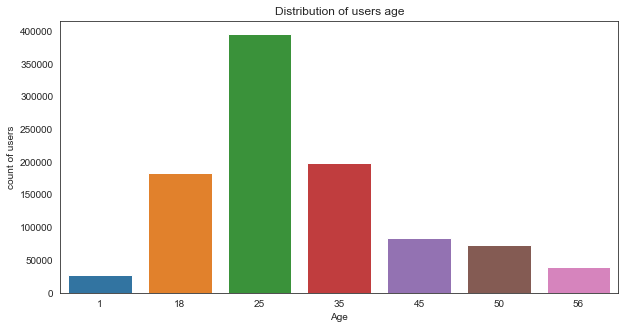

In [10]:
#count plot
plt.figure(figsize =(10,5))
sns.countplot(df['Age'])
plt.title("Distribution of users age")
plt.ylabel('count of users')
plt.xlabel('Age')

* Majority of the users are 25 years old

In [11]:
df['Age'].max()

56

In [12]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59']
df['age_group'] = pd.cut(df.Age, range(0, 70, 10), right=False, labels=labels)
df[['Age', 'age_group']].drop_duplicates()[:10]

,Age,age_group
0,35,30-39
1,45,40-49
2,18,10-19
4,25,20-29
9,50,50-59
11,1,0-9
38,56,50-59


Text(0.5, 0, 'Age')

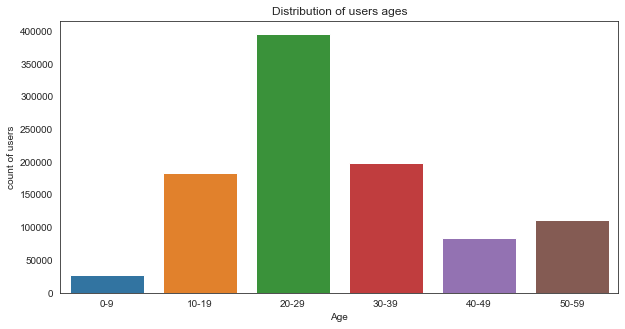

In [13]:
# count plot of age groups
plt.figure(figsize =(10,5))
sns.countplot(df['age_group'])
plt.title("Distribution of users ages")
plt.ylabel('count of users')
plt.xlabel('Age')

### Visualize overall rating by users

In [14]:
df['Rating'].value_counts()

4.0    348944
3.0    261189
5.0    226292
2.0    107557
1.0     56174
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

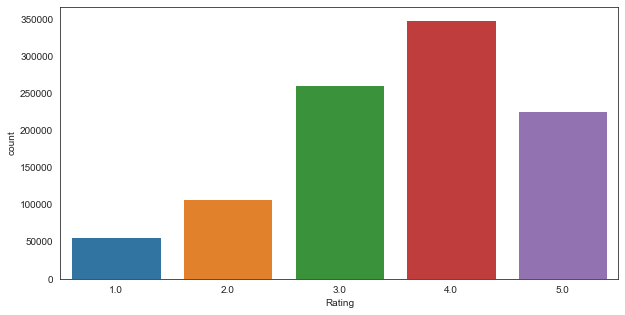

In [15]:
# countplot - Rating
plt.figure(figsize =(10,5))
sns.countplot(df['Rating'])

* majority of rating is 4 (counts - 348944)

In [16]:
gby_title = df.groupby('Title')
gby_rating = df.groupby('Rating')
gby_userid = df.groupby('UserID')

In [17]:
movies = gby_title.size().sort_values(ascending=True).head()
print(movies)

Title
Another Man's Poison (1952)    1
Night Tide (1961)              1
Shadows (Cienie) (1988)        1
McCullochs, The (1975)         1
Anna (1996)                    1
dtype: int64


### Find and visualize the user rating of the movie “Toy Story”

In [18]:
ToyStory_df = gby_title.get_group('Toy Story 2 (1999)')
ToyStory_df

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,age_group
834568,3114,Toy Story 2 (1999),Animation|Children's|Comedy,3.0,3.0,978298103.0,M,25,15,55117,20-29
834569,3114,Toy Story 2 (1999),Animation|Children's|Comedy,9.0,4.0,978225952.0,M,25,17,61614,20-29
834570,3114,Toy Story 2 (1999),Animation|Children's|Comedy,10.0,4.0,978225759.0,F,35,1,95370,30-39
834571,3114,Toy Story 2 (1999),Animation|Children's|Comedy,17.0,5.0,978159386.0,M,50,1,95350,50-59
834572,3114,Toy Story 2 (1999),Animation|Children's|Comedy,19.0,4.0,978147462.0,M,1,10,48073,0-9
...,...,...,...,...,...,...,...,...,...,...,...
836147,3114,Toy Story 2 (1999),Animation|Children's|Comedy,6022.0,5.0,956755741.0,M,25,17,57006,20-29
836148,3114,Toy Story 2 (1999),Animation|Children's|Comedy,6024.0,4.0,956749447.0,M,25,12,53705,20-29
836149,3114,Toy Story 2 (1999),Animation|Children's|Comedy,6027.0,4.0,956726766.0,M,18,4,20742,10-19
836150,3114,Toy Story 2 (1999),Animation|Children's|Comedy,6036.0,4.0,956710231.0,F,25,15,32603,20-29


In [19]:
df[df.Title == 'Toy Story 2 (1999)'].groupby('Rating')['UserID'].count()

Rating
1.0     25
2.0     44
3.0    214
4.0    577
5.0    724
Name: UserID, dtype: int64

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

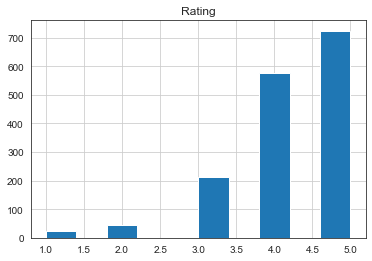

In [20]:
df[df['MovieID'] == 3114].hist(column='Rating')

* Majority user rating of the movie “Toy Story” is 5

### Find and visualize the viewership of the movie “Toy Story” by age group

In [21]:
ToyStory_df[['Title','age_group']].head()

,Title,age_group
834568,Toy Story 2 (1999),20-29
834569,Toy Story 2 (1999),20-29
834570,Toy Story 2 (1999),30-39
834571,Toy Story 2 (1999),50-59
834572,Toy Story 2 (1999),0-9


In [22]:
df[df.Title == 'Toy Story 2 (1999)'].groupby('Age')['UserID'].count()

Age
1      98
18    331
25    578
35    342
45    112
50     72
56     51
Name: UserID, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

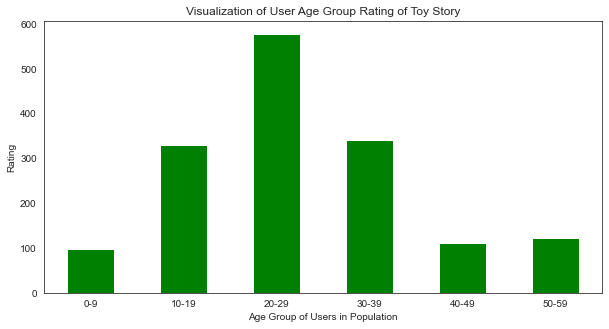

In [23]:
df[df.Title == 'Toy Story 2 (1999)'].groupby('age_group')['MovieID'].count().plot(kind = 'bar', color = 'green',figsize = (10,5))
plt.xlabel('Age Group of Users in Population')
plt.ylabel('Rating')
plt.title('Visualization of User Age Group Rating of Toy Story')
plt.xticks(rotation = 0)
plt.show

* users between 20-29 age group have highest viewership of the movie “Toy Story” 

### Find and visualize the top 25 movies by viewership rating

In [24]:
# movie name and total count of ratings
gby_title.size().sort_values(ascending=False)[:25]

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2990
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2652
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2582
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2512
Sixth Sense, The (1999)                                  2458
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [25]:
# movie id and total count of rating
df.groupby('MovieID')['Rating'].count().sort_values(ascending = False)[:25]

MovieID
2858    3428
1196    2990
260     2990
1210    2883
480     2672
2028    2652
589     2649
2571    2590
1270    2582
593     2578
1580    2538
1198    2514
608     2512
2762    2458
110     2443
2396    2369
1197    2317
527     2303
1617    2288
1265    2278
1097    2268
2628    2250
2997    2241
318     2227
858     2223
Name: Rating, dtype: int64

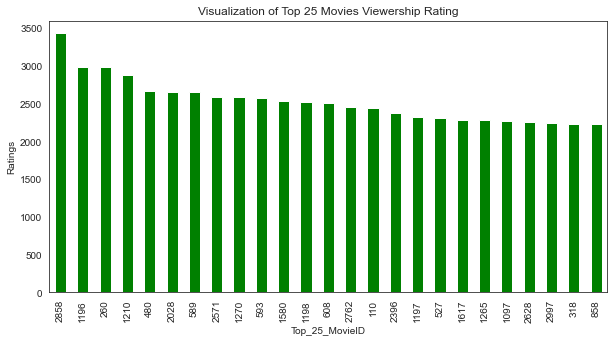

In [26]:
# visualization of top 25 movies by viewership rating
df.groupby('MovieID')['Rating'].count().sort_values(ascending = False)[:25].plot(kind ='bar', color = 'g',figsize = (10,5))
plt.xlabel('Top_25_MovieID')
plt.ylabel('Ratings')
plt.title('Visualization of Top 25 Movies Viewership Rating')
plt.show()

### Find the rating for a particular user of user id = 2696

In [27]:
df[df.UserID == 2696].groupby('Rating')['MovieID'].count()

Rating
1.0     2
2.0     3
3.0     3
4.0    11
5.0     1
Name: MovieID, dtype: int64

In [28]:
user2696 = df[df.UserID == 2696]
user2696

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,age_group
93181,350,"Client, The (1994)",Drama|Mystery|Thriller,2696.0,3.0,973308886.0,M,25,7,24210,20-29
198446,800,Lone Star (1996),Drama|Mystery,2696.0,5.0,973308842.0,M,25,7,24210,20-29
268245,1092,Basic Instinct (1992),Mystery|Thriller,2696.0,4.0,973308886.0,M,25,7,24210,20-29
272478,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696.0,3.0,973308690.0,M,25,7,24210,20-29
347231,1258,"Shining, The (1980)",Horror,2696.0,4.0,973308710.0,M,25,7,24210,20-29
358279,1270,Back to the Future (1985),Comedy|Sci-Fi,2696.0,2.0,973308676.0,M,25,7,24210,20-29
446187,1589,Cop Land (1997),Crime|Drama|Mystery,2696.0,3.0,973308865.0,M,25,7,24210,20-29
455087,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696.0,4.0,973308842.0,M,25,7,24210,20-29
457729,1625,"Game, The (1997)",Mystery|Thriller,2696.0,4.0,973308842.0,M,25,7,24210,20-29
462367,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696.0,2.0,973308920.0,M,25,7,24210,20-29


In [29]:
user2696.shape

(20, 11)

### Visualize the rating data by user of user id = 2696

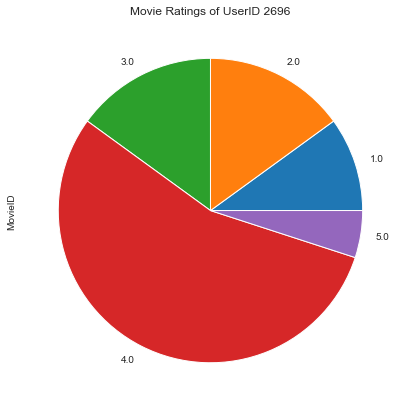

In [30]:
# pie chart
df[df.UserID == 2696].groupby('Rating')['MovieID'].count().plot(kind = 'pie',figsize = (8,7))
plt.title('Movie Ratings of UserID 2696')
plt.show()

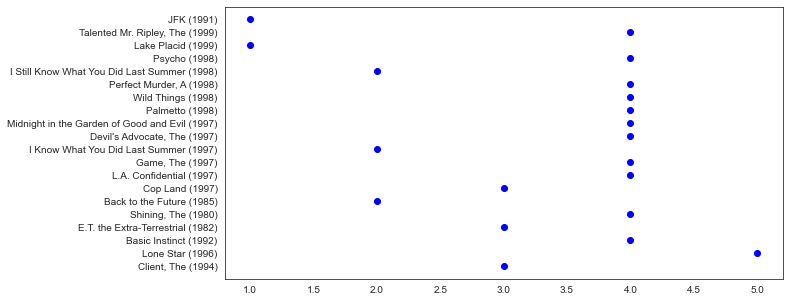

In [31]:
#scatterplot showing the movies that rated by user2696
plt.figure(figsize = (10,5))
user2696 = df[df.UserID == 2696]
plt.scatter(y= user2696.Title, x = user2696.Rating, color = 'b')

### 3. Perform machine learning on first 500 extracted records

In [32]:
# extract first 500 records
df_500 = df.head(500)
df_500.dropna(inplace=True)

In [33]:
df_500.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,age_group
0,2,Jumanji (1995),Adventure|Children's|Fantasy,10.0,5.0,979168267.0,F,35,1,95370,30-39
1,2,Jumanji (1995),Adventure|Children's|Fantasy,13.0,3.0,978202563.0,M,45,1,93304,40-49
2,2,Jumanji (1995),Adventure|Children's|Fantasy,18.0,2.0,978152541.0,F,18,3,95825,10-19
3,2,Jumanji (1995),Adventure|Children's|Fantasy,23.0,2.0,978461604.0,M,35,0,90049,30-39
4,2,Jumanji (1995),Adventure|Children's|Fantasy,27.0,1.0,978129692.0,M,25,11,19130,20-29


In [34]:
df_500.shape

(500, 11)

In [35]:
df_500.describe()

,MovieID,UserID,Rating,Timestamp,Age,Occupation
count,500.0,500.000000,500.000000,5.000000e+02,500.000000,500.000000
mean,2.0,2176.290000,3.184000,9.747610e+08,27.978000,7.624000
std,0.0,1283.397363,1.000072,1.034942e+07,11.541748,6.416304
min,2.0,10.000000,1.000000,9.653054e+08,1.000000,0.000000
25%,2.0,1114.250000,3.000000,9.685547e+08,18.000000,2.000000
50%,2.0,2082.500000,3.000000,9.747152e+08,25.000000,6.000000
75%,2.0,3389.500000,4.000000,9.757746e+08,35.000000,14.000000
max,2.0,4277.000000,5.000000,1.042345e+09,56.000000,20.000000


In [36]:
df_500.isnull().sum()

MovieID       0
Title         0
Genres        0
UserID        0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
age_group     0
dtype: int64

**Use the following features:**

* movie id
* age
* occupation

**Use rating as label**

In [37]:
# features:movie id,age,occupation
x = df_500[['MovieID','Age','Occupation']].values

# Use rating as label
y = df_500[['Rating']].values

### 4. Create train and test data set

In [38]:
# preprocessing
from sklearn.model_selection import train_test_split

In [39]:
#Create train and test data set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

### 5. Create a histogram for movie, age, and occupation

Text(0.5, 0, 'Age')

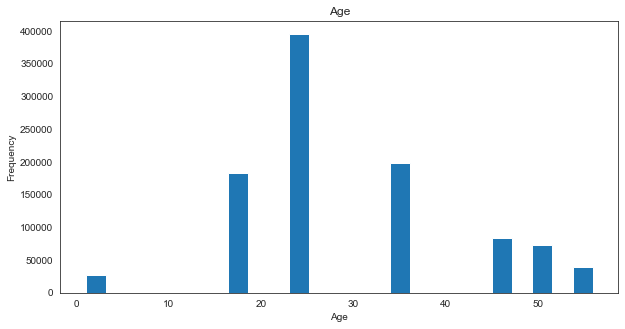

In [40]:
#histogram for age
plt.figure(figsize=(10,5))
df.Age.plot.hist(bins=25)
plt.title("Age")
plt.xlabel('Age')

Text(0.5, 0, 'Occupation')

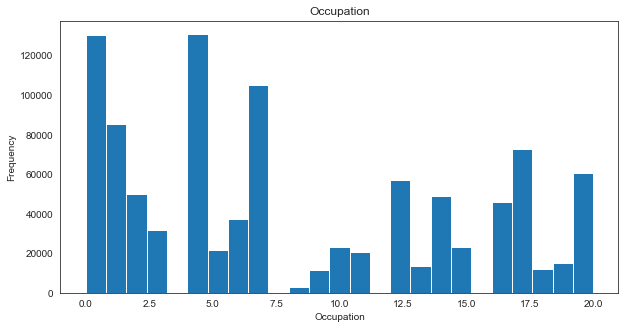

In [41]:
#histogram for occupation
plt.figure(figsize=(10,5))
df.Occupation.plot.hist(bins=25)
plt.title("Occupation")
plt.xlabel('Occupation')

### Movie ratings prediction by using different ML models

In [42]:
# Matrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [43]:
# #Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

####  Logistic Regression

In [44]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [45]:
y_pred = reg.predict(x_test)
y_pred1 = reg.predict(x_train)
print('Accuracy of train: ',accuracy_score(y_train,y_pred1))
print('Accuracy of test: ',accuracy_score(y_test,y_pred))
logi = accuracy_score(y_test,y_pred)*100
print(classification_report(y_test,y_pred))

Accuracy of train:  0.375
Accuracy of test:  0.46
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         7
         2.0       0.00      0.00      0.00        14
         3.0       0.46      0.76      0.57        41
         4.0       0.45      0.47      0.46        32
         5.0       0.00      0.00      0.00         6

    accuracy                           0.46       100
   macro avg       0.18      0.24      0.21       100
weighted avg       0.34      0.46      0.38       100



#### Linear SVC

In [46]:
model = svm.LinearSVC(random_state=4)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred1 = model.predict(x_train)
print('Accuracy of train: ',accuracy_score(y_train,y_pred1))
print('Accuracy of test: ',accuracy_score(y_test,y_pred))
LSVC = accuracy_score(y_test,y_pred)*100
print(classification_report(y_test,y_pred))

Accuracy of train:  0.3725
Accuracy of test:  0.42
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         7
         2.0       0.00      0.00      0.00        14
         3.0       0.42      1.00      0.59        41
         4.0       0.50      0.03      0.06        32
         5.0       0.00      0.00      0.00         6

    accuracy                           0.42       100
   macro avg       0.18      0.21      0.13       100
weighted avg       0.33      0.42      0.26       100



#### Support Vector Machines

In [47]:
model_svc = svm.SVC()
model_svc.fit(x_train, y_train)
y_pred = model_svc.predict(x_test)
y_pred1 = model_svc.predict(x_train)
print('Accuracy of train: ',accuracy_score(y_train,y_pred1))
print('Accuracy of test: ',accuracy_score(y_test,y_pred))
SVC = accuracy_score(y_test,y_pred)*100
print(classification_report(y_test,y_pred))

Accuracy of train:  0.4
Accuracy of test:  0.45
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         7
         2.0       0.00      0.00      0.00        14
         3.0       0.44      0.88      0.59        41
         4.0       0.50      0.28      0.36        32
         5.0       0.00      0.00      0.00         6

    accuracy                           0.45       100
   macro avg       0.19      0.23      0.19       100
weighted avg       0.34      0.45      0.36       100



#### K Nearest Neighbors Classifier

In [48]:
model_knn = KNeighborsClassifier(n_neighbors = 3)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
y_pred1 = model_knn.predict(x_train)
print('Accuracy of train: ',accuracy_score(y_train,y_pred1))
print('Accuracy of test: ',accuracy_score(y_test,y_pred))
KNN = accuracy_score(y_test,y_pred)*100
print(classification_report(y_test,y_pred))

Accuracy of train:  0.3875
Accuracy of test:  0.25
              precision    recall  f1-score   support

         1.0       0.10      0.43      0.16         7
         2.0       0.00      0.00      0.00        14
         3.0       0.48      0.32      0.38        41
         4.0       0.29      0.28      0.29        32
         5.0       0.00      0.00      0.00         6

    accuracy                           0.25       100
   macro avg       0.17      0.21      0.17       100
weighted avg       0.30      0.25      0.26       100



####  Decision Tree

In [49]:
model_dc = DecisionTreeClassifier()
model_dc.fit(x_train, y_train)
y_pred = model_dc.predict(x_test)
y_pred1 = model_dc.predict(x_train)
print('Accuracy of train: ',accuracy_score(y_train,y_pred1))
print('Accuracy of test: ',accuracy_score(y_test,y_pred))
DT = accuracy_score(y_test,y_pred)*100
print(classification_report(y_test,y_pred))

Accuracy of train:  0.5275
Accuracy of test:  0.39
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         7
         2.0       0.17      0.07      0.10        14
         3.0       0.48      0.78      0.60        41
         4.0       0.25      0.19      0.21        32
         5.0       0.00      0.00      0.00         6

    accuracy                           0.39       100
   macro avg       0.18      0.21      0.18       100
weighted avg       0.30      0.39      0.33       100



#### Random Forest

In [50]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train, y_train)
y_pred = model_rf.predict(x_test)
y_pred1 = model_rf.predict(x_train)
print('Accuracy of train: ',accuracy_score(y_train,y_pred1))
print('Accuracy of test: ',accuracy_score(y_test,y_pred))
RF = accuracy_score(y_test,y_pred)*100
print(classification_report(y_test,y_pred))

Accuracy of train:  0.5275
Accuracy of test:  0.39
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         7
         2.0       0.20      0.07      0.11        14
         3.0       0.50      0.71      0.59        41
         4.0       0.27      0.28      0.28        32
         5.0       0.00      0.00      0.00         6

    accuracy                           0.39       100
   macro avg       0.19      0.21      0.19       100
weighted avg       0.32      0.39      0.34       100



In [51]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Linear SVC', 
              'Decision Tree'],
    'Score': [SVC, KNN, logi, 
              RF, LSVC, DT]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,46.0
0,Support Vector Machines,45.0
4,Linear SVC,42.0
3,Random Forest,39.0
5,Decision Tree,39.0
1,KNN,25.0


* Submitted by,
 ALBIN P BENNY
* albinpbenny007@gmail.com